In [454]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd
import cmath as cm

In [455]:
#Parameters
fr=4e9;
bw=4e6;
fs=60e9;
des=0.0001;
Amp=1;
noise_power=0*1e-14*fs/2

In [456]:
#Tones Generation
N=100000;
t=np.arange(0,N/fr,1/fs)
M=1000
st=np.zeros(len(t))

for i in range(0,M-1):
    st+=Amp*np.sin(2*np.pi*t*(fr+i*bw*(1+des*np.random.normal(1))))
st+=np.random.normal(scale=np.sqrt(noise_power), size=st.shape)

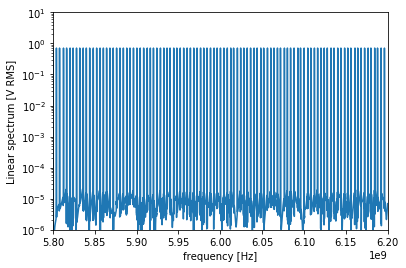

In [457]:
f, Pxx_spec = signal.periodogram(st, fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlim([0.58e10, 0.62e10])
plt.ylim([1e-6, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()
smax=max(Pxx_spec);

In [458]:
a=[0 ,1 ,0 ,-1e-5]

def nonlinamp(s,c):
    sn=c[0]+c[1]*s+c[2]*(s)**2+c[3]*(s)**3
    return sn

stnl=nonlinamp(st,a);

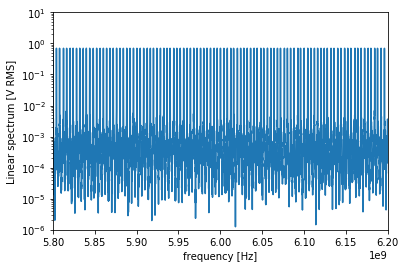

In [459]:
f, Pxx_specnl = signal.periodogram(stnl, fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_specnl))
plt.xlim([0.58e10, 0.62e10])
plt.ylim([1e-6, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

In [472]:
d=stnl-st

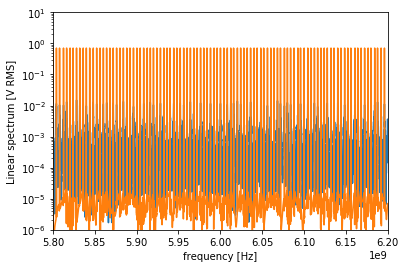

In [473]:
f, Pxx_specd = signal.periodogram(d, fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_specd),f, np.sqrt(Pxx_spec))
plt.ylim([1e-6, 1e1])
plt.xlim([0.58e10, 0.62e10])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()
dmax=max(Pxx_specd);

In [474]:
SNRdist=10*np.log10(smax/dmax)
print(SNRdist)

31.422083233002628


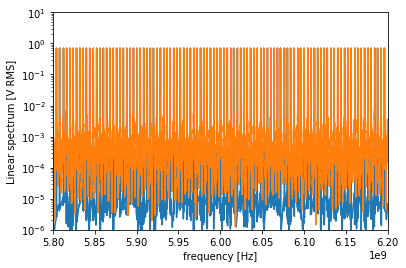

In [476]:
a=plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec),f, np.sqrt(Pxx_specnl))
plt.xlim([0.58e10, 0.62e10])
plt.ylim([1e-6, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()
a.savefig("foo.pdf")